In [6]:
# Importing necessary libraries
import pandas as pd              # For data manipulation
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns            # For beautiful charts
from sklearn.cluster import KMeans # The clustering algorithm
from sklearn.preprocessing import StandardScaler # For scaling features
import joblib                    # To save the trained model
import warnings                  # To handle warning messages

# Suppress warnings for a clean output
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")  # Set seaborn style for plots

In [7]:
# Load the dataset
customer_data = pd.read_csv('Mall_Customers.csv')

# View the first 5 rows
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
customer_data.shape

(200, 5)

In [9]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
customer_data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

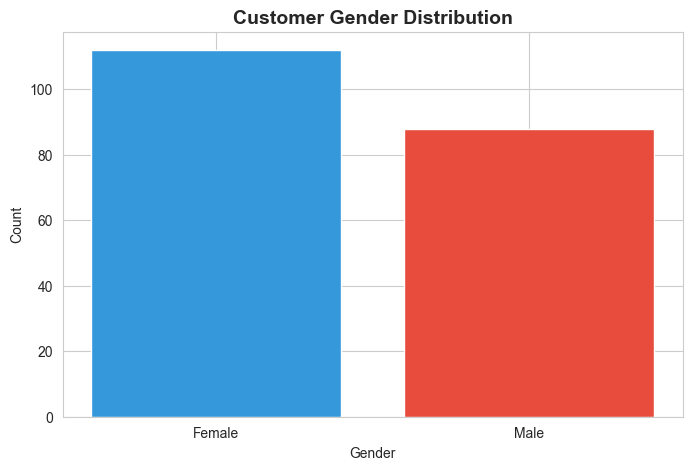

In [18]:
#Gender Distribution

plt.figure(figsize=(8,5))
gender_counts = customer_data['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['#3498db', '#e74c3c'])
plt.title('Customer Gender Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt. show()

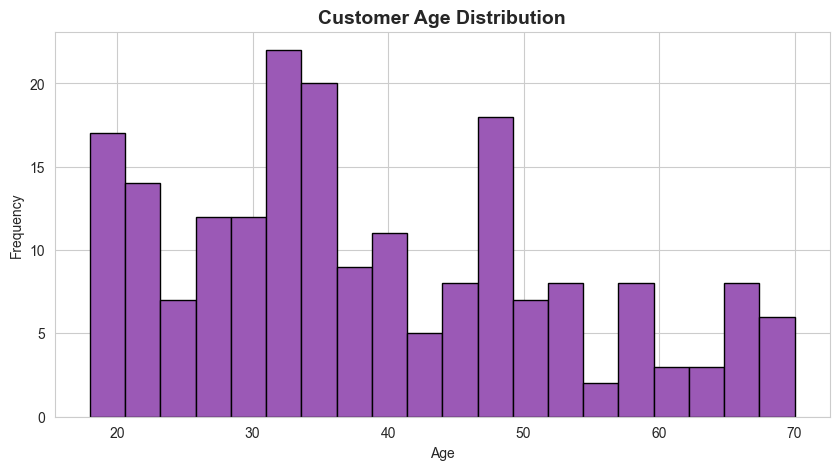

In [20]:
#Age Distribution

plt.figure(figsize=(10,5))
plt.hist(customer_data['Age'], bins=20, color=('#9b59b6'), edgecolor='black')
plt.title('Customer Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

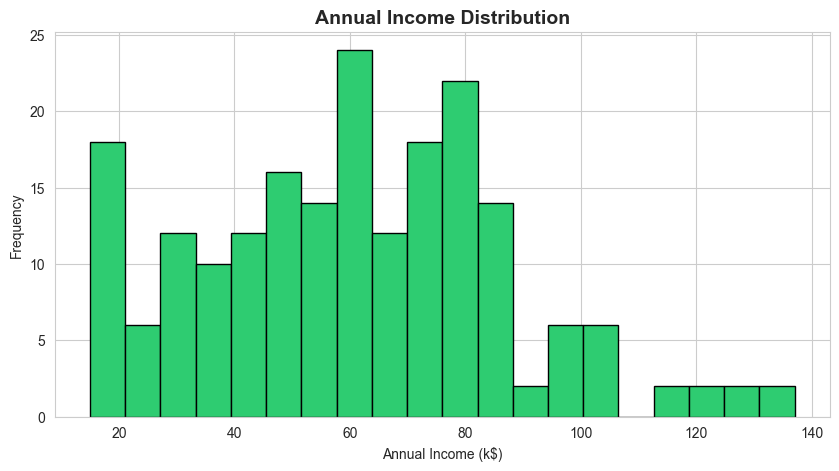

In [21]:
#Annual Income Distribution

plt.figure(figsize=(10,5))
plt.hist(customer_data['Annual Income (k$)'], bins=20, color='#2ecc71', edgecolor='black')
plt.title('Annual Income Distribution', fontsize=14, fontweight="bold")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

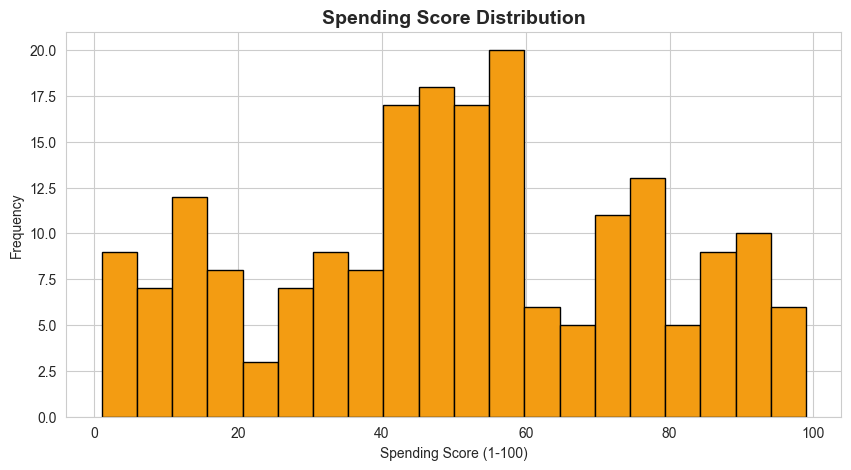

In [23]:
#Spending Score Distribution
plt.figure(figsize=(10,5))
plt.hist(customer_data['Spending Score (1-100)'], bins=20, color='#f39c12', edgecolor='black')
plt.title('Spending Score Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show

In [11]:
# Selecting Annual Income (Column index 3) and Spending Score (Column index 4)
X = customer_data.iloc[:, [3, 4]].values

In [24]:
# Calculate WCSS for different number of clusters (1 to 10)
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS value

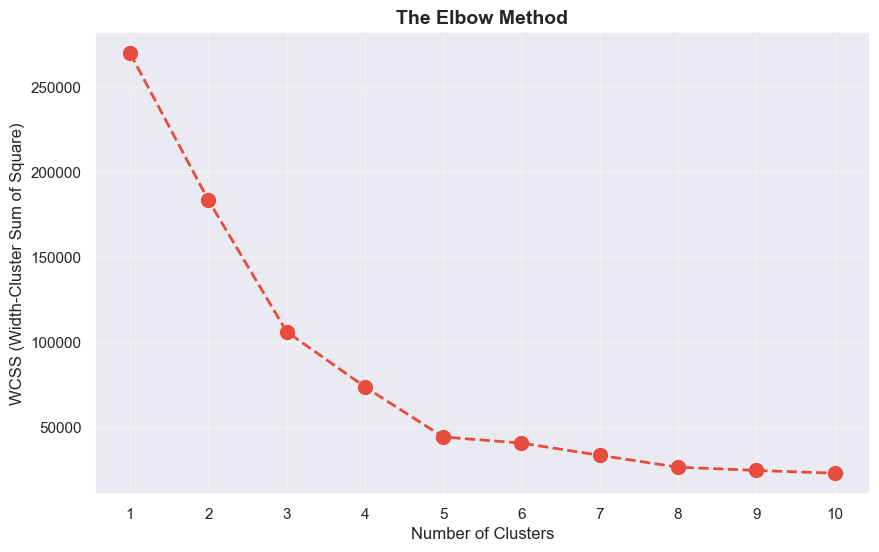

In [34]:
#plot Elbow Graph

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--', color='#e74c3c', linewidth=2, markersize=10)
plt.title('The Elbow Method', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Width-Cluster Sum of Square)')
plt.xticks(range(1,11))
plt.grid(True, alpha=0.3)
plt.show()

In [35]:
# Training the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# fit_predict trains the model AND assigns a cluster label (0-4) to each customer
Y = kmeans.fit_predict(X)

print(Y) # Outputs labels like [0, 2, 1, 4, 0...] for each customer

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


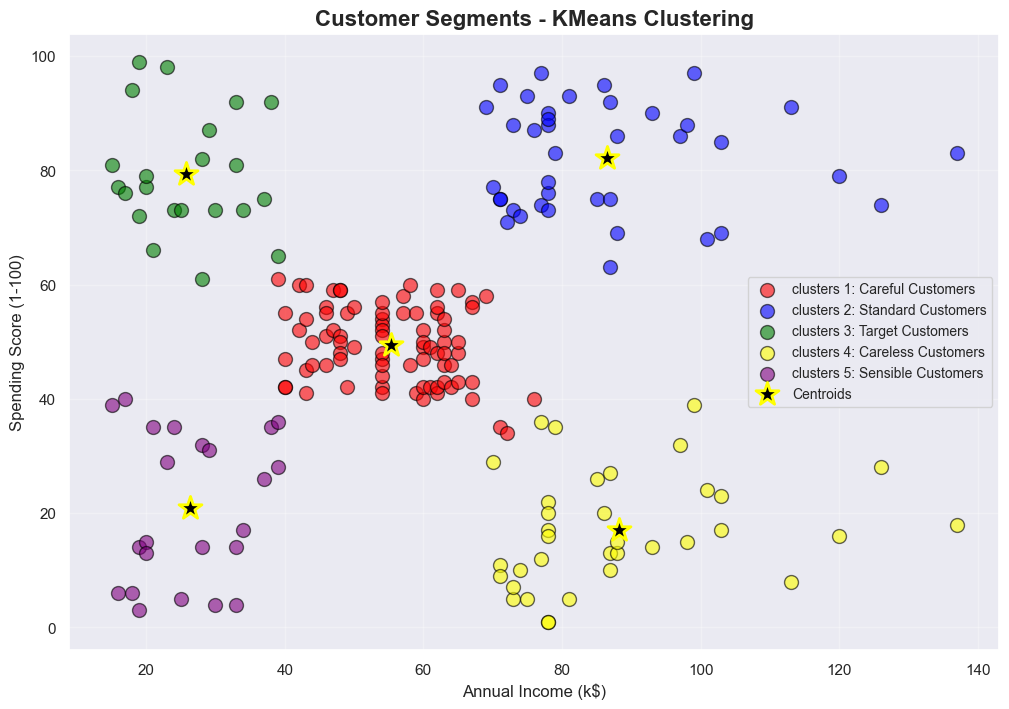

In [42]:
plt.figure(figsize=(12,8))

# Define cluster names
clusters_names = ['Careful Customers','Standard Customers','Target Customers','Careless Customers','Sensible Customers']
colors = ['red', 'blue', 'green', 'yellow', 'purple']

for i in range(5):
    plt.scatter(X[Y==i, 0], X[Y==i, 1], s=100, c=colors[i],
                label=f'clusters {i+1}: {clusters_names[i]}', alpha=0.6, edgecolors='black')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='black', marker='*', label='Centroids', edgecolors='yellow', linewidths=2)

plt.title('Customer Segments - KMeans Clustering', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()


In [43]:
customer_data['cluster'] = Y

In [47]:
customer_data['Cluster'] = Y

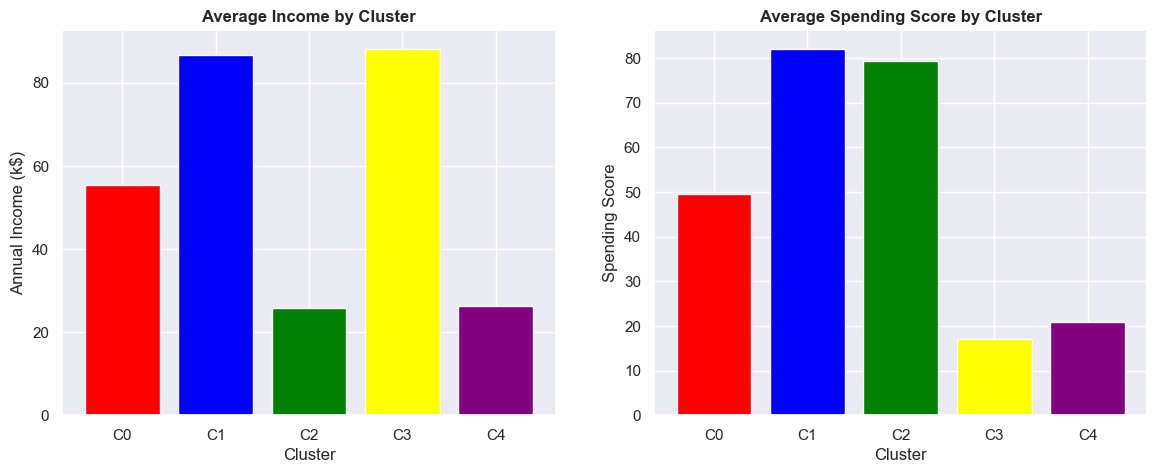

In [48]:
#Create Comparison visualization
fig, axes = plt.subplots(1,2, figsize=(14, 5))

# Income comparison
cluster_income = [customer_data[customer_data['Cluster']==i]['Annual Income (k$)'].mean()
                  for i in range(5)]

axes[0].bar(range(5), cluster_income, color=colors)
axes[0].set_title('Average Income by Cluster', fontweight='bold')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Annual Income (k$)')
axes[0].set_xticks(range(5))
axes[0].set_xticklabels([f'C{i}' for i in range(5)])

# Spending comparison
cluster_spending = [customer_data[customer_data['Cluster']==i]['Spending Score (1-100)'].mean()
                    for i in range(5)]
axes[1].bar(range(5), cluster_spending, color=colors)
axes[1].set_title('Average Spending Score by Cluster', fontweight='bold')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Spending Score')
axes[1].set_xticks(range(5))  
axes[1].set_xticklabels([f'C{i}' for i in range(5)])
plt.show()                                                                                                                    

In [51]:
new_customer = np.array([[70, 80]])
predicted_cluster = kmeans.predict(new_customer)[0]
print(f'Customer(Income: ${new_customer[0][0]}k, Spending: {new_customer[0][1]}) -- Cluster {predicted_cluster}: {clusters_names[predicted_cluster]}')

Customer(Income: $70k, Spending: 80) -- Cluster 1: Standard Customers


In [52]:
#Save the model
joblib.dump(kmeans,'customer_segmentation_model.pkl')
print("Model Saved")

Model Saved
